# Exercise 5

Zipfs Law: We will look at the Homework Sheets from this course

Firstly we import the files and apply some cleaning
- Set lower case for all letters
- remove line breaks and replace with white space
- remove some single standing letter from equations 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read file
file = open('Text/HW1.txt', 'r')
data_hw1 = file.read()

file = open('Text/HW2.txt', 'r')
data_hw2 = file.read()

file = open('Text/HW3.txt', 'r')
data_hw3 = file.read()


file = open('Text/HW4.txt', 'r')
data_hw4 = file.read()

data = data_hw1 + ' ' +  data_hw2 + ' ' + data_hw3 + ' ' + data_hw4

#file = open('Text/HW3.txt', 'r')
#data_hw3 = file.read()

# data cleaning
data = data.lower()

letters_remove = ['\n', '(', ')', ',', '∗', '"', '-', '−', '[', ']','|','<','>']
for letter in letters_remove:
    data = data.replace(letter, ' ')

# remove some letters because of equations
letters_remove = [' e ', ' i ', ' x ', ' y ', ' p ', ' t ', ' n ', ' l ', ' b ', ' c ']
for letter in letters_remove:
    data = data.replace(letter, ' ')
    
data = data.replace('.','')

word_list = data.split()

# counting
occurrences = data.count('homework')

In [3]:
word_list_unique = []
for word in word_list:
    if word not in word_list_unique:
        word_list_unique.append(word)

In [4]:
word_count = {}

for word in word_list_unique:
    word_count[word] = (data.count(word))
    
# remove some non sense
word_count['c'] = 0
word_count['i'] = 0
word_count['v'] = 0
word_count['f'] = 0
word_count['p'] = 0
word_count['m'] = 0
word_count['d'] = 0
word_count['h'] = 0
word_count['l'] = 0
word_count['r'] = 0
word_count['n'] = 0 
word_count['k'] = 0
word_count['1'] = 0
word_count['2'] = 0

    
word_count = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1])}


In [5]:
accur = np.array(list(word_count.values()))

top_ten = accur[-50:] # not really top ten anymore

In [6]:
x = np.arange(1, len(top_ten) + 1)
x = np.flip(x)

In [7]:
start_val = top_ten[-1]

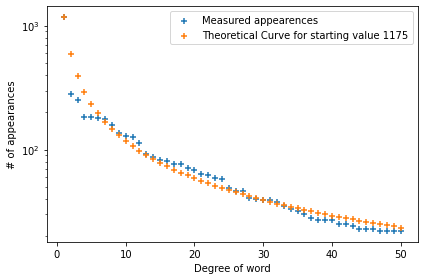

In [8]:
plt.scatter(x, top_ten,
            label='Measured appearences',
            marker='+')

plt.scatter(x, start_val / x, 
            label=f'Theoretical Curve for starting value {start_val}', 
            marker='+')
plt.legend()
plt.yscale('log')
plt.ylabel('# of appearances')
plt.xlabel('Degree of word')
plt.tight_layout()
plt.savefig('build/Ex5.pdf')